#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

<br>

## 1. Data loading & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Airline_delay\data\Airlines.csv')
print(df.head())
print(df.shape)

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0
(539383, 9)


In [3]:
df = df.iloc[:,1:]

In [50]:
df['Airline'].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [73]:
len(df['AirportFrom'].unique())

293

In [6]:
# from sklearn.preprocessing import LabelEncoder

In [7]:
# le_1 = LabelEncoder()
# le_encoder_1 = le_1.fit(df.loc[:,'Airline'])
# df.loc[:,'Airline'] = le_encoder_1.transform(df.loc[:,'Airline'])
# le_2 = LabelEncoder()
# le_encoder_2 = le_2.fit(df.loc[:,'AirportFrom'])
# df.loc[:,'AirportFrom'] = le_encoder_2.transform(df.loc[:,'AirportFrom'])
# le_3 = LabelEncoder()
# le_encoder_3 = le_3.fit(df.loc[:,'AirportTo'])
# df.loc[:,'AirportTo'] = le_encoder_3.transform(df.loc[:,'AirportTo'])

In [8]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


In [9]:
df.loc[:,'AirportTo'].nunique()

293

In [10]:
df.loc[:,'AirportFrom'].nunique()

293

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
OHE1 = OneHotEncoder(handle_unknown='ignore')
OHE2 = OneHotEncoder(handle_unknown='ignore')
OHE3 = OneHotEncoder(handle_unknown='ignore')

In [13]:
enc1= OHE1.fit(df[['Airline']])
enc2= OHE2.fit(df[['AirportFrom']])
enc3= OHE3.fit(df[['AirportTo']])

In [14]:
trans1 = enc1.transform(df[['Airline']])
trans2 = enc2.transform(df[['AirportFrom']])
trans3 = enc3.transform(df[['AirportTo']])

In [15]:
con1 = pd.DataFrame(trans1.toarray(), columns=enc1.categories_[0])
con2 = pd.DataFrame(trans2.toarray(), columns=enc2.categories_[0])
con3 = pd.DataFrame(trans3.toarray(), columns=enc3.categories_[0])

In [16]:
df = pd.concat([df,con1],axis=1)
df = pd.concat([df,con2],axis=1)
df = pd.concat([df,con3],axis=1)

In [17]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,9E,AA,...,TXK,TYR,TYS,UTM,VLD,VPS,WRG,XNA,YAK,YUM
0,CO,269,SFO,IAH,3,15,205,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,US,1558,PHX,CLT,3,15,222,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AA,2400,LAX,DFW,3,20,165,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AA,2466,SFO,DFW,3,20,195,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AS,108,ANC,SEA,3,30,202,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539379,FL,398,SEA,ATL,5,1439,305,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539380,FL,609,SFO,MKE,5,1439,255,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539381,UA,78,HNL,SFO,5,1439,313,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br>

## 2. Devide dataframe into X & Y -> Train X / Test X / Train Y / Test Y

In [18]:
target = df.loc[:,'Delay']
feature = df.drop(columns=['Delay','Airline','AirportFrom','AirportTo'])

In [19]:
from sklearn import model_selection

In [20]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(feature,target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(377568, 608)
(161815, 608)
(377568,)
(161815,)


In [21]:
train_data.tail()

,Flight,DayOfWeek,Time,Length,9E,AA,AS,B6,CO,DL,...,TXK,TYR,TYS,UTM,VLD,VPS,WRG,XNA,YAK,YUM
359783,3656,2,990,100,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152315,755,4,1080,268,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,917,2,1139,124,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435829,19,7,540,95,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305711,6628,6,925,190,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(train_data)

In [25]:
train_data = pd.DataFrame(scaler.transform(train_data), columns=feature.columns)
test_data = pd.DataFrame(scaler.transform(test_data),columns=feature.columns)


<br>

## 3. Change normal labels to one-hot labels

In [26]:
train_label[:5]

113669    0
85132     0
144594    0
349431    1
535787    1
Name: Delay, dtype: int64

In [27]:
from tensorflow.keras import utils

train_label = utils.to_categorical(train_label) # 0 or 1 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0 or 1 -> one-hot vector

print(train_label.shape) # 모양을 영어로?
print(test_label.shape) # 모양을 영어로?

# from sklearn import preprocessing
# enc = preprocessing.OneHotEncoder(categories='auto') # Apply 'One-hot encoding' on labels (Single integer to One-hot vector)
# train_label = enc.fit_transform(train_label).toarray()
# test_label = enc.fit_transform(test_label).toarray()

(377568, 2)
(161815, 2)


In [28]:
train_label

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

<br>

## 4. Build & Train the model 

In [29]:
import tensorflow as tf

# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [30]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [31]:
model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model.add(layers.Dense(input_dim=608, units=500, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)


model.add(layers.Dense(units=300, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.2)) # Dropout-layer

# model.add(layers.Dense(units=10, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))

model.add(layers.Dense(units=100, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.2)) # Dropout-layer

model.add(layers.Dense(units=2, activation='softmax')) # Apply softmax function on model's output

In [32]:
# "Compile" the model description (Configures the model for training)

model.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

In [33]:
# "Fit" the model on training data

history = model.fit(train_data, train_label, batch_size=5000, epochs=50, validation_split=0.3,verbose=2) 

Epoch 1/50
53/53 - 10s - loss: 0.7780 - categorical_accuracy: 0.5388 - val_loss: 0.7701 - val_categorical_accuracy: 0.4510
Epoch 2/50
53/53 - 9s - loss: 0.7169 - categorical_accuracy: 0.5521 - val_loss: 0.6863 - val_categorical_accuracy: 0.5458
Epoch 3/50
53/53 - 10s - loss: 0.6968 - categorical_accuracy: 0.5663 - val_loss: 0.6850 - val_categorical_accuracy: 0.5557
Epoch 4/50
53/53 - 10s - loss: 0.6658 - categorical_accuracy: 0.6075 - val_loss: 0.6707 - val_categorical_accuracy: 0.5875
Epoch 5/50
53/53 - 10s - loss: 0.6506 - categorical_accuracy: 0.6235 - val_loss: 0.6683 - val_categorical_accuracy: 0.5604
Epoch 6/50
53/53 - 9s - loss: 0.6443 - categorical_accuracy: 0.6292 - val_loss: 0.6648 - val_categorical_accuracy: 0.5761
Epoch 7/50
53/53 - 10s - loss: 0.6390 - categorical_accuracy: 0.6348 - val_loss: 0.6595 - val_categorical_accuracy: 0.6017
Epoch 8/50
53/53 - 10s - loss: 0.6346 - categorical_accuracy: 0.6389 - val_loss: 0.6669 - val_categorical_accuracy: 0.5959
Epoch 9/50
53/53 -

In [34]:
# "Evaluate" the model on test data

result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

5057/5057 [==============================] - 9s 2ms/step - loss: 0.6262 - categorical_accuracy: 0.6462
loss (cross-entropy) : 0.6262430548667908
test accuracy : 0.6462379693984985


In [66]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [66]:
print(history.history['categorical_accuracy'])

[0.5440129637718201, 0.5523558855056763, 0.5573427081108093, 0.5864803791046143, 0.6118041276931763, 0.622765302658081, 0.6294698715209961, 0.6330491900444031, 0.6385316252708435, 0.6410099267959595, 0.6407261490821838, 0.6427503824234009, 0.6437946557998657, 0.6435298323631287, 0.646004319190979, 0.6455843448638916, 0.6466626524925232, 0.6466361880302429, 0.6463448405265808, 0.648028552532196, 0.6473209857940674, 0.6485468745231628, 0.6482933759689331, 0.6483009457588196, 0.6486831307411194, 0.6487058401107788, 0.6486377120018005, 0.6494511961936951, 0.6477258801460266, 0.6494057774543762, 0.6493452191352844, 0.6481912136077881, 0.648849606513977, 0.6488193273544312, 0.6490955352783203, 0.6500792503356934, 0.650302529335022, 0.6493906378746033, 0.6508775949478149, 0.6499203443527222, 0.6485090851783752, 0.6486868858337402, 0.6499354839324951, 0.6496328115463257, 0.6487587690353394, 0.6493338942527771, 0.64894038438797, 0.651286244392395, 0.649980902671814, 0.6502760052680969]


In [36]:
%matplotlib inline

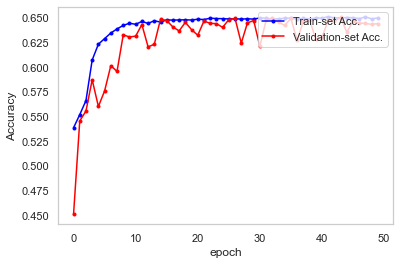

In [37]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [69]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

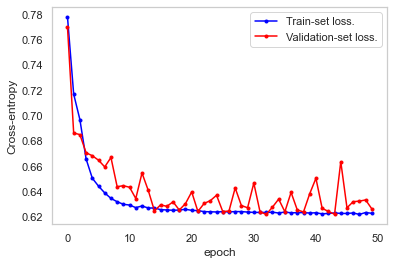

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

In [71]:
# 'Predict' on test data

model.predict(test_data)

array([[0.2195888 , 0.7804112 ],
       [0.82811254, 0.17188743],
       [0.24342093, 0.75657904],
       ...,
       [0.1821252 , 0.8178748 ],
       [0.5356752 , 0.46432477],
       [0.89463866, 0.10536131]], dtype=float32)

In [72]:
np.argmax(model.predict(test_data), axis=1)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [104]:
sample_data = np.array([[4,178,203,264,5,1439,326]])
sample_data.shape

(1, 7)

In [105]:
model.predict(sample_data)

array([[1.8143347e-14, 1.0000000e+00]], dtype=float32)

In [106]:
np.argmax(model.predict(sample_data), axis=1)

array([1], dtype=int64)

## Save model & load model

In [39]:
# 저장되는 항목 
# - Model의 architecture
# - Model의 모든 weights (Parameter Theta)
# - The state of the optimizer (바로 모델 학습의 재개 가능)

model.save('./model/trained_model.h5') # "Save" the model

# model.save_weights('trained_model.h5') # weights만 따로 저장도 가능함
# model.load_weights('trained_model.h5')

In [71]:
model = models.load_model('./model/trained_model.h5') # "Load" the "model"

# model.load_weights('trained_model.h5') # weights만 따로 불러올 수 있음

## FLASK 셋팅하기

In [133]:
from flask import Flask
from flask import render_template
from flask import request

In [134]:
app = Flask(__name__)

# FLASK API 구현부분

In [135]:
@app.route('/')
@app.route('/Airline_delay')
def AirlinePrediction():
    Airline = request.args.get("Airline")
    Flight = request.args.get("Flight")
    AirportFrom = request.args.get("AirportFrom")
    AirportTo = request.args.get("AirportTo")
    DayOfWeek = request.args.get("DayOfWeek")
    Time = request.args.get("Time")
    Length = request.args.get("Length")
       
    if Airline == None or Flight == None:
        return render_template('Airline.html', Output = '')
    
    Input = pd.DataFrame({
        'Airline': [str(Airline)],
        'Flight':  [float(Flight)] ,
        'AirportFrom': [str(AirportFrom)],
        'AirportTo': [str(AirportTo)] ,
        'DayOfWeek':  [float(DayOfWeek)] ,
        'Time':  [float(Time)] ,
        'Length':  [float(Length)]
    })
    
    
    
    trans1 = enc1.transform(Input[['Airline']])
    trans2 = enc2.transform(Input[['AirportFrom']])
    trans3 = enc3.transform(Input[['AirportTo']])
    con1 = pd.DataFrame(trans1.toarray(), columns=enc1.categories_[0])
    con2 = pd.DataFrame(trans2.toarray(), columns=enc2.categories_[0])
    con3 = pd.DataFrame(trans3.toarray(), columns=enc3.categories_[0])
    Input = pd.concat([Input,con1],axis=1)
    Input = pd.concat([Input,con2],axis=1)
    Input = pd.concat([Input,con3],axis=1)

    Input = Input.drop(columns=['Airline','AirportFrom','AirportTo'])
    
    # ModelOutput = model.predict(Input)[0][0]
    ModelOutput = np.argmax(model.predict(Input), axis=1)
    
    return render_template('Airline.html', Output = ModelOutput)

# Flask, port 5000으로 실행

In [136]:
app.run(host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Jul/2022 01:05:48] "GET /Airline_delay?Airline=B6&Flight=428&DayOfWeek=5&AirportFrom=ANC&AirportTo=IAH&Time=15&Length=202 HTTP/1.1" 200 -
127.0.0.1 - - [13/Jul/2022 01:06:01] "GET /Airline_delay?Airline=DL&Flight=108&DayOfWeek=3&AirportFrom=ANC&AirportTo=SEA&Time=30&Length=202 HTTP/1.1" 200 -
127.0.0.1 - - [13/Jul/2022 01:06:21] "GET /Airline_delay HTTP/1.1" 200 -
127.0.0.1 - - [13/Jul/2022 01:06:32] "GET /Airline_delay?Airline=YV&Flight=108&DayOfWeek=3&AirportFrom=ANC&AirportTo=SEA&Time=30&Length=202 HTTP/1.1" 200 -
[2022-07-13 01:06:37,275] ERROR in app: Exception on /Airline_delay [GET]
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\anaconda3\lib\site-packages\fla